## Ánalisis de Datos: Primeros Pasos

### Aclaración previa: Estadistica descriptiva e Inferencial, población y muestra.

En este módulo de Análisis de Datos al que pertnece el Sprint y la píldora, vamos a trabajar con lo que se denomina Estadística Descriptiva. Eso nos pemitirá construir nuestros EDA  para explorar y resumir conjuntos de datos, identificar patrones, tendencias y anomalías, y formular hipótesis iniciales. 

Pero ojo, aquí no se acaba el camino, esta parte de Análisis nos debe ayudar a tener una visión general y una comprensión de la naturaleza de los datos, que es fundamental antes de realizar cualquier inferencia estadística o aplicar modelos predictivos y ya estar en completa disposición de tomar casi cualquier decisión de forma informada. 

Será en el siguiente módulo el que abriremos con un repaso de la "otra" estadística la inferencial y con probabilidades, como preámbulo a la creación de modelos predictivos (y no sólo predictivos) como complemento esencial a tu formación como DataScientist. 

Al final del notebook te dejo algunas definiciones más formales de la estadística descriptiva y de la inferencial.

Y para terminar esta larga aclaración, digamos burdamente que en la estadística descriptiva trabajamos sobre nuestros datos como si fueran los únicos que hubiera del tema que estamos tratando (como si fueran lo que se dice la población completa) y con la estadística inferencial partimos del contexto de que queremos sacar conclusiones que se puedan generalizar fuera de esos datos concretos (pensamos que trabajamos con una muestra del total de datos posibles). Por ejemplo:
* Si nuestro datasets es de las ventas de yogures en los supermercados de madrid de nuestra marcar. Al hacer el EDA y trabajar con estadística descriptiva vamos a contar la historia de ese contexto en concreto sin pensar en que exista otro. Para este caso los supermercados de Madrid de nuestra marca son todos los supermercados del mundo (toda la población), aunque no podremos generalizar.
* Si a partir de los datos anteriores y su EDA quiero obtener (o inferir) datos que me digan cómo podrían ser las ventas en los supermercados de la competencia, en mis supermercados cuando los abra en otra ciudad, etc, etc Entonces estoy generalizando (entonces mis datos anteriores son una muestra) y usaremos estadística inferencial y modelos de aprendizaje automático. 

Ok, respira y vamos al lío... 

### Tengo los datos preparadísimos y ahora ¿qué?

Ahora puedes estar en una de estas dos situaciones:

1. Tienes claro que quieres sacar de los datos (o te lo han dejado claro las jefas): preguntas a respuestas del tipo ¿qué tipo de cliente compra más en mis tiendas del norte del páis frente al resto?¿Es mejor comprar o alquilar, en qué ciudades?, o confirmaciones/negaciones de hipótesis de trabajo:las criptomonedas se emplean principalmente para el lavado de dinero.

2. Tienes una idea muy vaga o ninguna sobre lo qué quieres obtener, sólo sabes que te gusta el dataset o es el que te han proporcionado en el curro.

Si estás en la primera, no te aceleres, déjame que te dé unas pautas que adaptes según esas preguntas. Si estás en la segunda, sigue las pautas y a medida que analicemos los datos surgirán preguntas o conclusiones que debes empezar a pensar si son interesantes o no (recuerda que si no tienes objetivo tu objetivo es buscarlo, y que estos pasos te ayudarán)

### #0 Los datasets guía

Como siempre lo primero importamos:

In [2]:
import pandas as pd

Para poder trabajar la unidad vamos a ponernos en dos situaciones diferentes y a trabajar con dos `datasets` distintos:

#### Caso 1 (top-down EDA): Compañía de Seguros
En este caso, que llamaremos EDA-TD, vamos a partir de un dataset de una compañía de seguros que tiene muy claro lo que quiere que hagas: Quiere que analices el Lifetime Customer Value (el valor acumulado de un cliente a lo largo de su relación con una empresa, por ejemplo: todo el dinero que le has dado a tu compañía de teléfonos), resumidadmente CLV, y la respuesta a las ofertas de marketing. En concreto quiere saber:
1. ¿Cómo se distribuye demográficamente el CLV? (es decir por género, región, nivel de eduación, etc)
2. ¿Cómo responden los clientes a las ofertas de renovación?
3. ¿Cómo se distribuye esa oferta de renovación? (¿Responden mejor los hombres?¿Los dueños de coches de lujo?¿Qué canal tiene mejor respuesta)
4. ¿Qué relación hay entre las reclamaciones y CLV y entre aquellas y la respuesta a marketing?

Para ello cargamos en df_seguros los datos de esta empresa:

In [3]:
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")

In [4]:
pd.set_option("display.max_columns", None)
df_seguros.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [5]:
df_seguros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i


#### Caso 2 (bottom-up EDA): Nuevo departamento DataScience de TabarAir

En est otro caso, que llamaremos EDA-BU, partimos de nuestro conocido dataset de viajes de compañías aéreas, aunque con algunos cambios. La unidad de BI de TabarAir ha creado recientemente una unidad de Ciencia del Dato y como todavía no tiene claro qué quiere hacer nos ha pasado datos que ha conseguido de la competencia junto con los suyos propios y nos pide que le saquemos, literalmente "todo el jugo posible". Vamos que ninguna directriz "operativa"...

 De hecho nos ha pasado datos de dos meses, Junio y Julio, por separado.

Carguemos los datos y hechemos un vistazo:

In [6]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun23.csv")
df_air_jul = pd.read_csv("./data/dataset_viajes_jul23.csv")

In [7]:
df_air_jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aircompany  600 non-null    object 
 1   origen      600 non-null    object 
 2   destino     600 non-null    object 
 3   distancia   600 non-null    int64  
 4   avion       600 non-null    object 
 5   con_escala  600 non-null    bool   
 6   consumo_kg  600 non-null    float64
 7   duracion    600 non-null    int64  
 8   ingresos    600 non-null    float64
 9   id_vuelo    600 non-null    object 
 10  mes         600 non-null    object 
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 47.6+ KB



### #1 Completa lo que sabes de tus datos: definiciones y temporalidad

Y ahora sí, empezamos y lo primero que te comento que hagas es una ficha y una tabla como la siguiente:

**Dataset:**  
**Descripción:**  
**Periodo:**  

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Col1|Se trata de la variable que mide x...|||||

Y que rellenes la parte superior y las dos primeras columnas (no rellenes tipo porque no se refiere al tipo de los valores, lo vemos más adelante) y la de notas con todo aquello especial de lo que te hayan podido informar cuando recabaste los datos y sus definiciones. Si no puedes o no lo tienes claro, PREGUNTA (a quien te proporcionó los datos)


Veamos como sería para nuestros dos casos de estudio: [y así aprovecho para aclarar algunos aspectos sobre la temporalidad]

#### Caso 1: Seguros, top-down

**Dataset:**  Marketing-Customer-Analysis.csv  
**Descripción:** Datos acumulados de clientes con CLV, respuestas de marketing y datos demográficos y de partes  
**Periodo:**  Foto global hasta la fecha desde el comienzo de operaciones. 

| Nombre del campo                  | Descripción                                                                 | Tipo de variable | Importancia Inicial | Notas |
|-----------------------------------|----------------------------------------------------------------------------|------------------|---------------------|-------|
| customer                          | ID del cliente                                                             |                  |                     |       |
| state                             | Estados en US                                                              |                  |                     |       |
| customer_lifetime_value           | CLV es el valor económico del cliente para la empresa durante toda su relación |                  |                     |   En dolares    |
| response                          | Respuesta a campañas/llamadas (marketing-engagement)                       |                  |                     |       |
| coverage                          | Tipo de cobertura del cliente                                              |                  |                     |       |
| education                         | Nivel educativo del cliente                                                |                  |                     |       |
| effective_to_date                 | Fecha efectiva                                                             |                  |                     |       |
| employmentstatus                  | Estado laboral del cliente                                                 |                  |                     |       |
| gender                            | Género del cliente                                                         |                  |                     |       |
| income                            | Ingresos del cliente                                                       |                  |                     |       |
| location_code                     | Zona de residencia del cliente                                             |                  |                     |       |
| marital_status                    | Estado Civil del cliente                                                   |                  |                     |       |
| monthly_premium_auto              | Premium mensual                                                            |                  |                     |       |
| months_since_last_claim           | Última reclamación del cliente                                             |                  |                     |       |
| months_since_policy_inception     | Inicio de la póliza                                                        |                  |                     |       |
| number_of_open_complaints         | Reclamaciones abiertas                                                     |                  |                     |  Son partes, no quejas     |
| number_of_policies                | Número de pólizas                                                          |                  |                     |       |
| policy_type                       | Tipo de póliza                                                             |                  |                     |       |
| policy                            | Póliza                                                                     |                  |                     |       |
| renew_offer_type                  | Oferta de renovación                                                       |                  |                     |       |
| sales_channel                     | Canal de ventas (primer contacto compañía-cliente)                         |                  |                     |  Puede continuar en otro canal diferente     |
| total_claim_amount                | Monto de la reclamación                                                    |                  |                     |       |
| vehicle_class                     | Tipo de vehículo                                                           |                  |                     |       |
| vehicle_size                      | Tamaño del vehículo                                                        |                  |                     |       |


En este caso lo que tenemos es una foto fija aunque sea de un periodo muy extenso, periodo que no conocemos y deberíamos acotar, por ejemplo. En este caso nos vamos a enfocar sólo en la situación y no en su evolución temporal. No se trata de un dataset con histórico, aunque podría tener series temporales dentro (por ejemplo si fuera de las cotizaciones de la empresa y no de sus clientes).

#### Caso 2: Viajes, bottom-up

Aquí tenemos dos datsets, uno para el mes de Junio y otro para el mes de Julio. Así que rellenamos dos minifichas y una única tabla.



**Dataset1:**  dataset_viajes_jun23.csv  
**Descripción:** Datos de vuelos de las cinco compañías, con origen, destino, ingresos para el mes de Junio de 2023  
**Periodo:**  Foto para el mes de junio. Sin datos diarios.

**Dataset2:**  dataset_viajes_jul23.csv  
**Descripción:** Datos de vuelos de las cinco compañías, con origen, destino, ingresos para el mes de Julio de 2023  
**Periodo:**  Foto para el mes de julio. Sin datos diarios.  

| Nombre del campo | Descripción                                              | Tipo de variable | Importancia Inicial | Notas |
|------------------|----------------------------------------------------------|------------------|---------------------|-------|
| aircompany       | Nombre de la compañía aérea                              |        |                     |       |
| origen           | Aeropuerto o ciudad de salida del vuelo                  |       |                     |       |
| destino          | Aeropuerto o ciudad de llegada del vuelo                 |       |                     |       |
| distancia        | Distancia recorrida por el vuelo en kilómetros           |      |                     |       |
| avion            | Modelo o tipo de avión utilizado en el vuelo             |      |                     |       |
| con_escala       | Indicador de si el vuelo tiene escalas (Sí/No)           |          |                     |       |
| consumo_kg       | Consumo de combustible en kilogramos del vuelo           |        |                     |       |
| duracion         | Tiempo total del vuelo en minutos                |        |                     |       |
| ingresos         | Ingresos generados por el vuelo                         |         |                     |   Euros    |
| id_vuelo         | Identificador del vuelo                            |        |                     | Es el mismo para Origen-Destino y compañía, no es único      |
| mes              | Mes en el que se realizó el vuelo                        |       |                     |    Con año   |


#### Análisis con periodos temporales o históricos.


Para terminar este paso, fíjate que debes decidir qué haces cuando tienes histórico: ¿un mini-análisis por mes y luego los comparo?¿Concateno los dataframes y uso la variable temporal como una variable más de análisis (como veremos en la segunda unidad del tema)? No hay una respuesta correcta, depende y por tanto, o bien preguntamos a nuestros jefes o bien usamos el mejor criterio que tengamos.  

En general con temas de histórico y temporales se suele dividir el análisis en "estaciones" o "periodos", analizarlos cada uno por separado y por año y compararlos entre sí luego. Aquí vamos a seguirr esa aproximación, vamos a analizar uno sólo y luego analizaremos el otro (repitiendo los pasos y compararemos, de hecho lo harás tú en los ejercicios), por de pronto, nos centramos en Junio y luego lo llevaremos a Julio.

Ojo, una cosa es tener histórico y otra analizar series temporales. Como en realidad nosotros no tenemos los datos tan detallados (no tenemos fechas de vuelo por ejemplo), no lo podemos considerar un análisis de serie temporal, que dejaremos para su unidad particular pero ya en el bloque de Machine Learning. 

Nota: Si tienes un datset con series, por ejemplo la cotización de Bitcoin, puedes seguir todos los pasos que vamos a hacer nosotros, con la salvedad que vas a manejar principalmente datos numéricos y compararlos como series y no como agregados.

### #2 Completa lo que sabes de tus datos: variables numéricas y categóricas

Es hora de rellenar la columna de tipo de variables, pero no el tipo Python o pandas, sino el tipo categórico, numérico, fecha o booleanos que ya vimos. ¿Por qué? Porque las vamos a tratar diferentes y sobre todo, porque a la hora de hacer el análisis lo despiezaremos por un tipo de variables y lo realizaremos sobre otro tipo de variables (en general, no hay un caso único).

Entonces para poder rellenar nuestra columna, repasemos los tipos de forma somera

#### Variables categóricas, numéricas, fechas y binarias:

Lo primero, llamamos variable o feature o característica a cada una de las columnas de nuestros datos tabulares. Y ahora sobre esas vamos a marcar que tipo son siguiendo el siguiente esquema: 


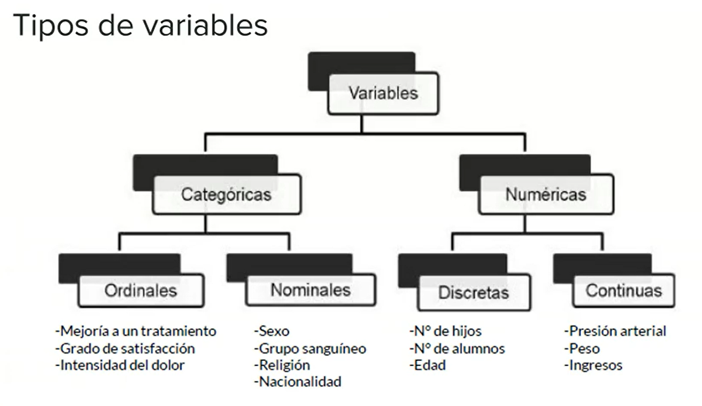

Y en general también distiguiremos las tipo Fecha (si no nos las han dado convertidas) y un tipo especial de Categóricas que son las que solo tienen dos valores (las binarias)

Vamos a clasificar nuestras variables para los dos casos, tranquilidad, te lo voy a dar hecho, pero para que te sirva de guía, obtén siempre la cardinalidad de las variables por si te ayuda junto con las descripciones a usarlo.

In [8]:
# Caso 1. Selección

df_tipificacion = pd.DataFrame([df_seguros.nunique(), 
                                df_seguros.nunique()/len(df_seguros) * 100, 
                                df_seguros.dtypes]).T.rename(columns = {0: "Card",\
                                1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
customer,9134,100.0,object
state,5,0.054741,object
customer_lifetime_value,8041,88.03372,float64
response,2,0.021896,object
coverage,3,0.032844,object
education,5,0.054741,object
effective_to_date,59,0.645938,object
employmentstatus,5,0.054741,object
gender,2,0.021896,object
income,5694,62.338515,int64


In [9]:
df_seguros.effective_to_date

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: effective_to_date, Length: 9134, dtype: object

Ahora podemos hacer una clasificación directa por la cardinalidad, directamente los que tengan 2 serán binarios, los que tengan menos de 10 valores categóricas y el resto numéricas.   
Dentro de las numéricas, las que tengan % de cardinalidad superior al 30% las consideraremos continuas, el resto serán discretas.  

Y finalmente las de cardinalidad 100% serán indices. Ojos estos valores umbral pueden cambiar y además después de esta clasificació automática debemos hacer un repaso teniendo en cuenta la definición y ajustar las que necesitemos (por ejemplo las categóricas habrá que separarlas en ordinales y nominales, las tipo fecha que no aparecen como tal pues como fechas). Hagamos el primer análisis para el caso 1, y te dejo resueto el caso 2 para que lo hagas por tu cuenta.

In [10]:
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion


,Card,%_Card,Tipo,Clasificada_como
customer,9134,100.0,object,Numerica Continua
state,5,0.054741,object,Categorica
customer_lifetime_value,8041,88.03372,float64,Numerica Continua
response,2,0.021896,object,Binaria
coverage,3,0.032844,object,Categorica
education,5,0.054741,object,Categorica
effective_to_date,59,0.645938,object,Numerica Discreta
employmentstatus,5,0.054741,object,Categorica
gender,2,0.021896,object,Binaria
income,5694,62.338515,int64,Numerica Continua


+ Si las repasamos, vemos que customer con esa cardinalidad, y viendo sus valores, es claramente un índice. Y lo marcaremos así.
+ Las otras variables que me llaman la atención: effective_to_date (por la definición que claramente dice que es una fecha), todas las que comienzan por number (porque tienen pinta de que son numéricas discretas y así es como es mejor clasificarlas).
+ Para estas haremos un unique:


In [11]:

df_seguros.effective_to_date.unique() # Sí es una fecha

array(['2/24/11', '1/31/11', '2/19/11', '1/20/11', '2/3/11', '1/25/11',
       '1/18/11', '1/26/11', '2/17/11', '2/21/11', '1/6/11', '2/6/11',
       '1/10/11', '1/17/11', '1/5/11', '2/27/11', '1/14/11', '1/21/11',
       '2/5/11', '1/29/11', '2/28/11', '2/12/11', '2/2/11', '2/7/11',
       '1/22/11', '2/13/11', '1/15/11', '1/8/11', '1/11/11', '1/28/11',
       '2/8/11', '2/23/11', '1/2/11', '2/16/11', '1/27/11', '1/23/11',
       '1/9/11', '2/11/11', '2/4/11', '2/1/11', '2/15/11', '2/26/11',
       '1/16/11', '1/1/11', '2/10/11', '1/24/11', '2/25/11', '1/12/11',
       '2/9/11', '1/19/11', '1/4/11', '2/14/11', '2/20/11', '2/18/11',
       '1/3/11', '1/13/11', '1/30/11', '2/22/11', '1/7/11'], dtype=object)

In [12]:
df_seguros.number_of_open_complaints.unique()

array([0, 2, 1, 3, 5, 4])

In [13]:
df_seguros.number_of_policies.unique()

array([1, 8, 2, 7, 9, 4, 3, 6, 5])

Decido cambiar los tipos a estas tres, (a las de number porque no sólo es un orden 8>7 etc sino porque 4 polizas abiertas son el doble que 2... y esa relación matemática quiero seguir considerándola al menos por ahora). 

Nuestra tabla descriptiva quedaría como:


| Nombre del campo                  | Descripción                                                                 | Tipo de variable      | Importancia Inicial | Notas |
|-----------------------------------|----------------------------------------------------------------------------|-----------------------|---------------------|-------|
| customer                          | ID del cliente                                                             | Índice Único           |                     |       |
| state                             | Estados en US                                                              | Categórica            |                     |       |
| customer_lifetime_value           | CLV es el valor económico del cliente para la empresa durante toda su relación | Numérica Continua    |                     |       |
| response                          | Respuesta a campañas/llamadas (marketing-engagement)                       | Binaria          |                     |       |
| coverage                          | Tipo de cobertura del cliente                                              | Categórica            |                     |       |
| education                         | Nivel educativo del cliente                                                | Categórica            |                     |       |
| effective_to_date                 | Fecha efectiva                                                             | Fecha                 |                     |       |
| employmentstatus                  | Estado laboral del cliente                                                 | Categórica            |                     |       |
| gender                            | Género del cliente                                                         | Binaria            |                     |       |
| income                            | Ingresos del cliente                                                       | Numérica Continua     |                     |       |
| location_code                     | Zona de residencia del cliente                                             | Categórica            |                     |       |
| marital_status                    | Estado Civil del cliente                                                   | Categórica            |                     |       |
| monthly_premium_auto              | Premium mensual                                                            | Numérica Continua     |                     |       |
| months_since_last_claim           | Última reclamación del cliente                                             | Numérica Continua     |                     |       |
| months_since_policy_inception     | Inicio de la póliza                                                        | Numérica Continua     |                     |       |
| number_of_open_complaints         | Reclamaciones abiertas                                                     | Numérica Discreta     |                     |       |
| number_of_policies                | Número de pólizas                                                          | Numérica Discreta     |                     |       |
| policy_type                       | Tipo de póliza                                                             | Categórica            |                     |       |
| policy                            | Póliza                                                                     | Categórica            |                     |       |
| renew_offer_type                  | Oferta de renovación                                                       | Categórica            |                     |       |
| sales_channel                     | Canal de ventas (primer contacto compañía-cliente)                         | Categórica            |                     |       |
| total_claim_amount                | Monto de la reclamación                                                    | Numérica Continua     |                     |       |
| vehicle_class                     | Tipo de vehículo                                                           | Categórica            |                     |       |
| vehicle_size                      | Tamaño del vehículo                                                        | Categórica            |                     |       |


#### Caso 2. Definición de tipos.

Aquí te dejo lo que sería mi resultado para el análisis inicial de tipos en el caso de los vuelos aéreos:

| Nombre del campo | Descripción                                              | Tipo de variable | Importancia Inicial | Notas |
|------------------|----------------------------------------------------------|------------------|---------------------|-------|
| aircompany       | Nombre de la compañía aérea                              | Categórica       |                     |       |
| origen           | Aeropuerto o ciudad de salida del vuelo                  | Categórica       |                     |       |
| destino          | Aeropuerto o ciudad de llegada del vuelo                 | Categórica       |                     |       |
| distancia        | Distancia recorrida por el vuelo en kilómetros           | Numérica Continua       |                     |       |
| avion            | Modelo o tipo de avión utilizado en el vuelo             | Categórica       |                     |       |
| con_escala       | Indicador de si el vuelo tiene escalas (Sí/No)           | Binaria          |                     |       |
| consumo_kg       | Consumo de combustible en kilogramos del vuelo           | Numérica Continua        |                     |       |
| duracion         | Tiempo total del vuelo en minutos                | Numérica Continua     |                     |       |
| ingresos         | Ingresos generados por el vuelo                          | Numérica Continua     |                     |       |
| id_vuelo         | Identificador único del vuelo                            | Categórica       |                     |       |
| mes              | Mes en el que se realizó el vuelo                        | Categórica        |                     | No aporta mientras no se compare con otros meses       |


### #3 Variables directoras (target)

Hemos avanzado. Por lo menos esto nos servirá luego para hacer mejor el análisis con más de una variable. Pero ahora lo que tenemos que hacer es intentar priorizar un poco más las variables [Imaginate tener 6000 campos o variables, si quisieramos hacer un EDA exahustivo no acabamos ni en 3 años, en el caso de nuestros dataset igual podríamos estudiar todas las variables y todas sus posibles combinaciones, pero si tengo un tiempo limitado mejor priorizar]. Con dos criterios:  

* Marcar las que son principales o directoras (serán lo que llamaremos target cuando entremos en modelos). [Por ejemplo en el caso de la aseguradora tenemos el customer_lifetime_value y el response como dos variables importantes. En el caso de los aviones tendremos que usar nuestra intuición o poner de primera las que más nos guste, pero allí donde haya ingresos o costes, si no nos dicen nada más, las consideraremos como directoras.]

* Marcar las variables que puedan ser interesantes para hacer un estudio agrupando por las mismas. [De nuevo en el caso de la aseguradora nos dice que necesita agrupar o estudiar por las demográficas, por el tipo de oferta, el canal. En general aquí van a entrar normalmente categóricas. En el caso de los aviones, como no tenemos directrices, busca valores categóricos y ordénalos por la importancia directa a tu empresa, por ejemplo es más importante entender como funciona la competencia que el tipo de avion o el destino, pero entre destino/origen y tipo de avion??? Cuando hay tan pocas, las marcamos todas y haremos el estudio agrupando por cualquiera de ellas.]

Según esos criterios, a mí me sale lo siguiente (pero ojo aquí entra un poco el sentido común y el conocimiento,sí, del negocio), clasificándolas en **target/directora (0), agrupación importante (1), agrupación interesante (2), agrupación secundaria (3)**

#### Caso 1.

| Nombre del campo                  | Descripción                                                                 | Tipo de variable      | Importancia Inicial | Notas                                                     |
|-----------------------------------|----------------------------------------------------------------------------|-----------------------|---------------------|-----------------------------------------------------------|
| customer                          | ID del cliente                                                             | Categórica            | -                   | Identificador único, para análisis muy de detalle (outliers)           |
| state                             | Estados en US                                                              | Categórica            | 2                   | Puede influir en las preferencias y necesidades del cliente|
| customer_lifetime_value           | CLV es el valor económico del cliente para la empresa durante toda su relación | Numérica Continua    | 0                   | Indicador clave de la lealtad y rentabilidad del cliente  |
| response                          | Respuesta a campañas/llamadas (marketing-engagement)                       | Categórica            | 0                   | Mide la eficacia del engagement y marketing y nos la han marcado como importante              |
| coverage                          | Tipo de cobertura del cliente                                              | Categórica            | 2                   | Relacionado con el nivel de servicio y precio              |
| education                         | Nivel educativo del cliente                                                | Categórica            | 1                   | Demográfica  |
| effective_to_date                 | Fecha efectiva                                                             | Fecha                 | -                 | Todos los valores al mes de estudio, no valor real aparente |
| employmentstatus                  | Estado laboral del cliente                                                 | Categórica            | 2                   | Puede influir en la capacidad de pago y tipo de servicio   |
| gender                            | Género del cliente                                                         | Categórica            | 1                   | Útil para análisis demográfico                             |
| income                            | Ingresos del cliente                                                       | Numérica Continua     | 0                   | Indica el poder adquisitivo y potencial de gasto del cliente |
| location_code                     | Zona de residencia del cliente                                             | Categórica            | 1                   | Clave para análisis regional y de accesibilidad            |
| marital_status                    | Estado Civil del cliente                                                   | Categórica            | 1                   | Demográfica             |
| monthly_premium_auto              | Premium mensual                                                            | Numérica Continua     | 1                   | Indicador de ingresos recurrentes y lealtad del cliente   |
| months_since_last_claim           | Última reclamación del cliente                                             | Numérica Continua     | 2                   | Proporciona información sobre la frecuencia de reclamaciones |
| months_since_policy_inception     | Inicio de la póliza                                                        | Numérica Continua     | 2                   | Útil para entender la antigüedad y lealtad del cliente     |
| number_of_open_complaints         | Reclamaciones abiertas                                                     | Numérica Discreta     | 3                   | Indica el nivel de satisfacción o problemas del cliente    |
| number_of_policies                | Número de pólizas                                                          | Numérica Discreta     | 1                   | Refleja la diversificación y la profundidad de la relación con el cliente |
| policy_type                       | Tipo de póliza                                                             | Categórica            | 2                   | Proporciona insights sobre preferencias de cobertura       |
| policy                            | Póliza                                                                     | Categórica            | 3                   | Detalle específico de la cobertura del cliente             |
| renew_offer_type                  | Oferta de renovación                                                       | Categórica            | 1                   | Mide la efectividad de las estrategias de retención        |
| sales_channel                     | Canal de ventas (primer contacto compañía-cliente)                         | Categórica            | 1                   | Clave para analizar la eficacia de los canales de venta    |
| total_claim_amount                | Monto de la reclamación                                                    | Numérica Continua     | 0                   | Indica el costo de las reclamaciones y la salud financiera de la empresa |
| vehicle_class                     | Tipo de vehículo                                                           | Categórica            | 2                   | Puede indicar preferencias y necesidades específicas       |
| vehicle_size                      | Tamaño del vehículo                                                        | Categórica            | 3                   | Relacionado con el tipo de cobertura y riesgo              |


#### Caso 2.

| Nombre del campo | Descripción                                              | Tipo de variable | Importancia Inicial | Notas                                           |
|------------------|----------------------------------------------------------|------------------|---------------------|-------------------------------------------------|
| aircompany       | Nombre de la compañía aérea                              | Categórica       | 1                   | Importante desde el momento en que es básicamente un análisis comparativo entre compañías|
| origen           | Aeropuerto o ciudad de salida del vuelo                  | Categórica       | 2                   | Importante para análisis geográficos, y de rutas ?hay rutas muy cubiertas?¿poco?     |
| destino          | Aeropuerto o ciudad de llegada del vuelo                 | Categórica       | 2                   | Clave para entender rutas y conexiones y posibles destinos no cubiertos, nuevos mercados          |
| distancia        | Distancia recorrida por el vuelo en kilómetros           | Numérica         | 1                   | Impacta en consumo de combustible y duración    |
| avion            | Modelo o tipo de avión utilizado en el vuelo             | Categórica       | 2                   | Relacionado con la capacidad y eficiencia       |
| con_escala       | Indicador de si el vuelo tiene escalas (Sí/No)           | Binaria          | 3                  | Puede ser interesante, pero hasta no verla con más detalle, parece menos importante que el resto        |
| consumo_kg       | Consumo de combustible en kilogramos del vuelo           | Numérica         | 0                   | Esencial para análisis de eficiencia y costes   |
| duracion         | Tiempo total del vuelo en horas o minutos                | Numérica         | 1                   | Importante para la planificación y logística    |
| ingresos         | Ingresos generados por el vuelo                          | Numérica         | 0                   | Indicador clave de rentabilidad                 |
| id_vuelo         | Identificador único del vuelo                            | Categórica       | -                   | En principio descartada |
| mes              | Mes en el que se realizó el vuelo                        | Categórica       | -                   |  No es útil si no es para la comparación y ya están separados los datasets |


Además he añadido notas que te pueden servir de guía en tu propio EDA. En general consideramos las variables importantes en función del siguiente criterio:
* Indican éxito,fracso y precio o coste: ingresos, numero de clientes, numero de visitas, conversiones, numero de vidas salvadas, numero de ventas, de clientes satisfechos, de personas felices, etc etc y costes (Estas suelen ser importantes siempre, y con un criterio amplio)
* Indican perfiles de cliente, sobre quién o qué debemos actuar o no hacerlo: variables que ayudan a perfilar el cliente, o la entidad que nos interese (empresas en las que invertir, zonas del cuerpo en las que intervenir, etc) 
* Permiten conocer dónde y cuándo: Lugares geográficos, temporales, etc.

Ojo, puede que luego vaya cambiando algún orden a medida que avance el análisis, pero este es un buen punto de partida, por lo menos con criterio y orden.

### SIGUIENTES PASOS

Todo lo anterior es aplicar unos cálculos, considerar nuestras definiciones y criterios o bien dados o bien genéricos para poner un poco de orden y si es necesario preguntar más antes de epmezar con el análisis. Este se puede continuar de muchas formas, pero nuestro plan para las siguientes sesiones es:

* Vamos a analizar las variables de forma separada. Lo que se llama **análisis univariante**.

* Vamos a analizar las variables relacionándolas entre sí (de dos en dos, **análisis bivarinante**, o en grupos **análisis multivariante**): bien por agrupaciones o bien buscando relaciones matemáticas entre ellas.

- Para cada paso iremos tomando notas, buscando descubrir cosas (con un criterio muy sencillo: Lo que destaque y si no destaca nada, eso es lo destacado). Emplearemos medidas estadísticas, análisis visual sobre gráficas y uso de tablas (de frecuencias generalmente)

- Nuestro análisis estará más guiado o menos en función de si partimos con cuestiones e hipótesis previas o no, pero al terminar una "primera" pasada tendremos conclusiones y respuestas (y la falta de estas también es una conclusión). 

- En ese momento decidiremos si queremos o necesitamos dar una segunda vuelta o tercer vuelta o ahondar en algún aspecto que se no has quedado cojo (puede incluso que queramos más datos) o bien pasamos ya a ordenar nuestras conclusiones de forma que cuenten una historia y entraríamos ya en el sprint siguiente dedicado a mostrar y presentar resultados.



ANEXO:

La estadística se divide en dos grandes áreas:

- **Estadística descriptiva**: Se dedica a la **descripción, visualización y resumen** de datos originados a partir de los fenómenos de estudio. Los datos pueden ser resumidos **numérica o gráficamente**. Su objetivo es organizar y describir las características sobre un conjunto de datos con el propósito de facilitar su aplicación, generalmente con el apoyo de gráficas, tablas o medidas numéricas.

    - Ejemplos básicos de parámetros estadísticos son: la media y la desviación estándar.
    - Ejemplos gráficos son: histograma, pirámide poblacional, gráfico circular, entre otros.
    

- **Estadística inferencial**: Se dedica a la generación de los **modelos, inferencias y predicciones** asociadas a los fenómenos en cuestión teniendo en cuenta la aleatoriedad de las observaciones. Se usa para modelar **patrones en los datos** y extraer inferencias acerca de la población bajo estudio. Estas inferencias pueden tomar la forma de respuestas a preguntas sí/no (prueba de hipótesis), estimaciones de unas características numéricas (estimación). **Su objetivo es obtener conclusiones útiles para lograr hacer deducciones acerca de la totalidad de todas las observaciones hechas, basándose en la información numérica.**